<a href="https://colab.research.google.com/github/Jiang-Li/notebook_demo/blob/main/TS_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

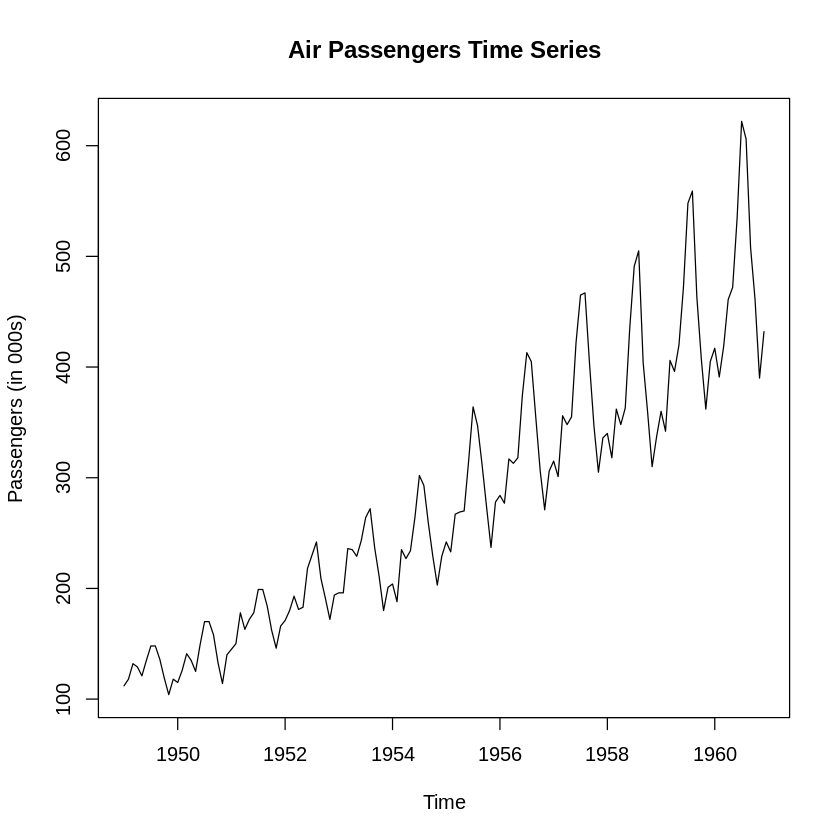

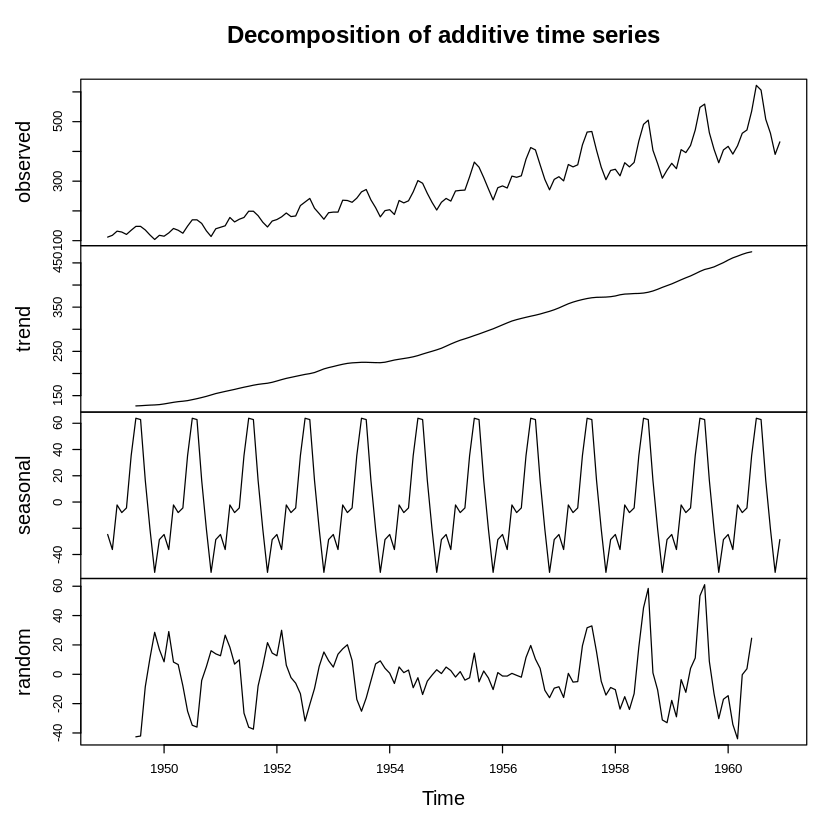

In [ ]:
# Load the AirPassengers dataset
data("AirPassengers")

# Plot the original time series
plot(AirPassengers,
     xlab = "Time", ylab = "Passengers (in 000s)",
     main = "Air Passengers Time Series"
)

# Decompose the time series
AirPassengersComp <- decompose(AirPassengers)

# Plot the decomposed components
plot(AirPassengersComp)


In [ ]:
nValid <- 12
nTrain <- length(AirPassengers) - nValid

# partition the data
train.ts <- window(AirPassengers, start = c(1949, 1), end = c(1949, nTrain))
valid.ts <- window(AirPassengers,
                   start = c(1949, nTrain + 1),
                   end = c(1949, nTrain + nValid)
)

In [ ]:
# Load required libraries

install.packages("forecast")
library(forecast)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’




In [ ]:
# Fit the model
model <- tslm(train.ts ~ trend + I(trend^2) + season)


# Make predictions for the validation period
predictions <- forecast(model, h = nValid)


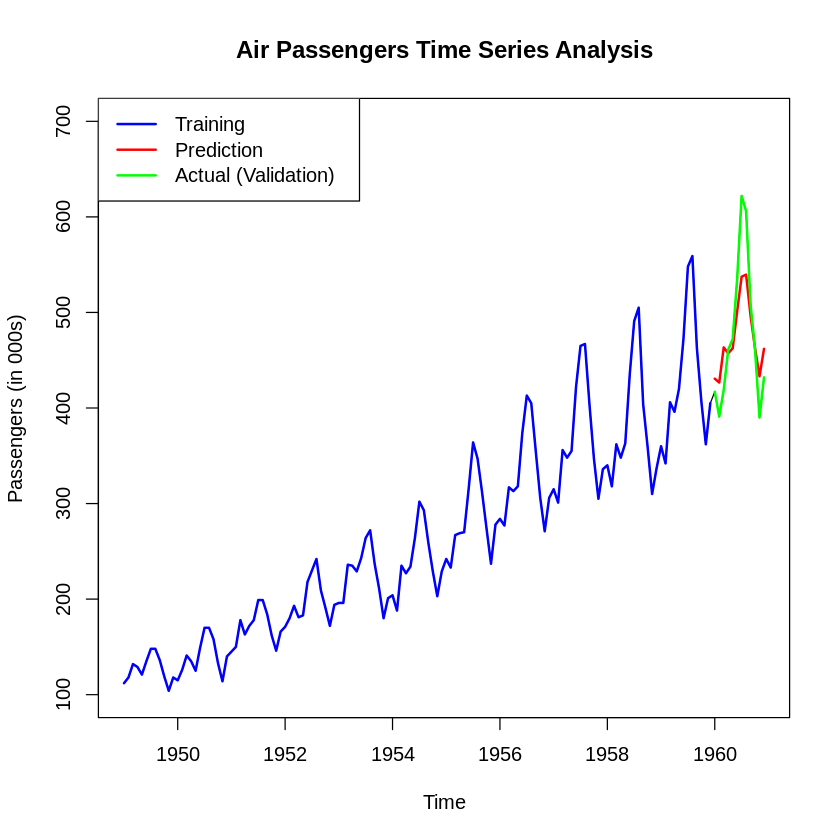

In [ ]:
# Plot the results
plot(AirPassengers,
     xlab = "Time", ylab = "Passengers (in 000s)",
     main = "Air Passengers Time Series Analysis",
     ylim = c(100, 700))

# Add lines for training, predictions, and actual validation data
lines(train.ts, col = "blue", lwd = 2)
lines(predictions$mean, col = "red", lwd = 2)
lines(valid.ts, col = "green", lwd = 2)

# Add a legend
legend("topleft",
       legend = c("Training", "Prediction", "Actual (Validation)"),
       col = c("blue", "red", "green"),
       lwd = 2)